In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1240,2024-02-23,12650,12750,12500,12550,469600
1241,2024-02-26,12550,12850,12500,12800,627300
1242,2024-02-27,12800,12850,11950,12700,293900
1243,2024-02-28,12900,12900,12650,12650,494700


In [3]:
#3. Partition the data into necessary segments
data_model = data[['close']]
split = int(len(data)*0.8)
train = data_model[:split]
test = data_model[split:]

In [4]:
#4. Using auto ARIMA to find the most suitable p, d, q and fit with model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15173.608, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15202.976, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15177.039, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15172.052, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15202.434, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15170.457, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15171.653, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15171.623, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15169.828, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15171.703, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15173.037, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15169.121, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15171.227, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=15170.905, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
#5. Check the p-value to see if it is statistically significant
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  996
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -7581.561
Date:                Wed, 29 May 2024   AIC                          15169.121
Time:                        01:30:11   BIC                          15183.829
Sample:                             0   HQIC                         15174.713
                                - 996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1706      0.022      7.659      0.000       0.127       0.214
ma.L2         -0.0614      0.026     -2.407      0.016      -0.111      -0.011
sigma2      2.432e+05   8529.503     28.518      0.0

In [6]:
#6. Predict on the test data
predictions = model.predict(n_periods=len(test)+90)
predict_test = predictions[:-90]

In [7]:
#7. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(test, predict_test))
mape = mean_absolute_percentage_error(test, predict_test) * 100
msle = mean_squared_log_error(test, predict_test)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 962.7286310333312
MAPE: 6.688517705655775 %
MSLE: 0.006084883911293094


In [8]:
#8. Predict close prices for the next 30, 60, 90 days
next_30_days = predictions[-90:-60]
next_60_days = predictions[-90:-30]
next_90_days = predictions[-90:]

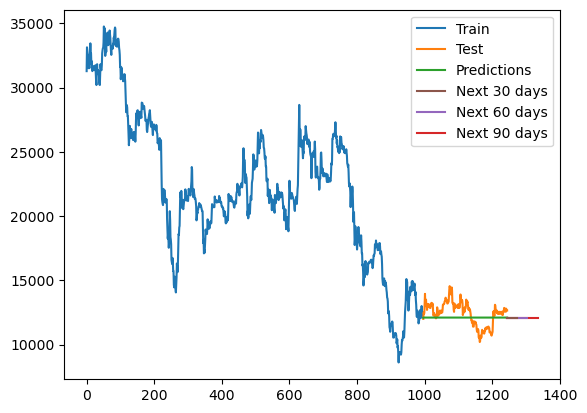

In [9]:
#9. Draw the plot
line1, = plt.plot(train.index, train["close"], label="Train")
line2, = plt.plot(test.index, test['close'], label="Test")
line3, = plt.plot(test.index, predict_test, label="Predictions")
line4, = plt.plot(next_90_days.index, next_90_days, label="Next 90 days")
line5, = plt.plot(next_60_days.index, next_60_days, label="Next 60 days")
line6, = plt.plot(next_30_days.index, next_30_days, label="Next 30 days")
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\ARIMA_HVN_82.png")
plt.show()
